In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_final.csv', index_col=0)
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,5864.791484,480,5219.889308,4593.730994,4737.952367,0.075206,0.0,2505.270905,4985.686604,5358.364787,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
1,5864.791484,18300,11252.430270,12166.479530,4737.952367,1.063492,-1.0,6122.293626,8621.426035,9007.739139,2273.463724,6873.875154,5919.184856,5862.136698,0.0,1.0
2,5864.791484,9800,13332.624775,4593.730994,10663.846715,0.650794,-1.0,6092.941274,8621.426035,11071.351592,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
3,5864.791484,1500,2828.211457,4593.730994,4737.952367,-0.730159,0.0,6281.659842,4985.686604,5358.364787,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
4,5864.791484,3600,2828.211457,4593.730994,4737.952367,-0.825397,-2.4,6721.586025,8621.426035,6508.064481,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0


In [160]:
columnas_eliminar = ['abtest_control', 'abtest_test' ,'month_created', 'year_created', 'lastSeen', 'monthOfRegistration', 'dateCrawled']

In [161]:
df.drop(columns=columnas_eliminar, inplace=True)

In [162]:
x= df.drop(columns='price')
y = df[['price']]

In [163]:
y.describe()

,price
count,356209.000000
mean,5919.659879
std,8292.917940
min,1.000000
25%,1299.000000
50%,3150.000000
75%,7500.000000
max,199900.000000


In [164]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [165]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [166]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 8157.01218129],
       [ 6711.04822789],
       [-3676.92834407]])

In [167]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[ 8183.46218682],
       [ 9444.77498017],
       [-4120.29260853]])

In [168]:
metricas = {
'train': {
    'r2_score': r2_score(y_train, y_train_pred),
    'MAE': mean_absolute_error(y_train, y_train_pred),
    'MSE': mean_squared_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
},
'test': {
    'r2_score': r2_score(y_test, y_test_pred),
    'MAE': mean_absolute_error(y_test, y_test_pred),
    'MSE': mean_squared_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

}
}

pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.568851,3149.095123,2.972994e+07,5452.516482
test,0.574952,3132.511294,2.905009e+07,5389.813597


In [169]:
# Convertir a arrays planos si son multidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

Text(0, 0.5, 'Predicciones (y_test_pred)')

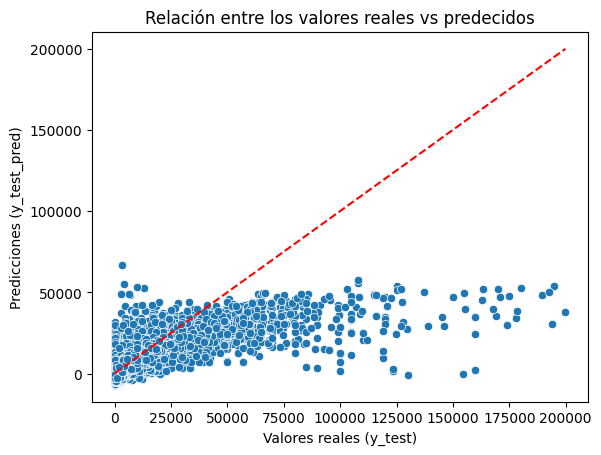

In [170]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

In [171]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

## K Fold

In [172]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_r2 = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="r2")

score_r2 # me quedo con la media de mis r2
np.mean(score_r2)

0.5707563408163704

In [173]:
kf = KFold(n_splits=5, #entre 5 y 10
           shuffle=True, # puede repetir cajas
           random_state=42)

score_mse = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="neg_mean_squared_error")

score_mse # me quedo con la media de mis r2
abs(np.mean(score_mse))

29532130.4106161

In [174]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_rmse = cross_val_score(modelo_lineal, 
                           x, 
                          y, 
                           cv = kf, 
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse))

5432.770348102209

## Decision Tree

In [175]:
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

In [176]:
params_arbol_2 = {
    'max_depth': [6, 8, 9, 10],
    'min_samples_split': [8, 9, 11, 13,],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [25, 30, 35, 40, 45]
}

In [177]:
params_arbol_3 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [7, 10, 12, 15],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [20,30,40,50]
}

In [178]:
params_arbol_4 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [9,12,14, 15],
    'min_samples_leaf': [70, 100, 130, 150],
    'max_leaf_nodes': [35,45,50,55]
}

In [179]:
params_arbol_5 = {
    'max_depth': [8,10,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [55,70,90,100]
}

In [180]:
params_arbol_7 = {
    'max_depth': [3,7,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [35,70,105,140]
}

In [181]:
params_arbol_6 = {
    'max_depth': [9, 9.5,11,17],
    'min_samples_split': [6,9,14,16],
    'min_samples_leaf': [20, 30, 40, 50],
    'max_leaf_nodes': [90,100,110,130]
}

PAMS 7

In [182]:
# grid_search_arbol_7 = GridSearchCV(DecisionTreeRegressor(),
#                                  param_grid=params_arbol_7,
#                                  cv = 5,
#                                  scoring= 'neg_mean_squared_error',
#                                  n_jobs=-1)
# grid_search_arbol_7.fit(x_train, y_train)

In [183]:
# modelo_final_arbol_7 = grid_search_arbol_7.best_estimator_

In [184]:
# y_test_pred_final_7 = modelo_final_arbol_7.predict(x_test)
# y_train_pred_final_7 = modelo_final_arbol_7.predict(x_train)

In [185]:
# df_metricas_arbol_7 = metricas(y_train, y_train_pred_final_7, y_test, y_test_pred_final_7)

In [186]:
# df_metricas_arbol_7

PAMS 4

In [187]:
grid_search_arbol_4 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_4,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [35, 45, 50, 55],
                         'min_samples_leaf': [70, 100, 130, 150],
                         'min_samples_split': [9, 12, 14, 15]},
             scoring='neg_mean_squared_error')

In [188]:
modelo_final_arbol_4 = grid_search_arbol_4.best_estimator_

In [189]:
y_test_pred_final_4 = modelo_final_arbol_4.predict(x_test)
y_train_pred_final_4 = modelo_final_arbol_4.predict(x_train)

In [190]:
df_metricas_arbol_4 = metricas(y_train, y_train_pred_final_4, y_test, y_test_pred_final_4)

In [191]:
df_metricas_arbol_4

,r2_score,MAE,MSE,RMSE
train,0.650104,2571.047909,2.412717e+07,4911.941941
test,0.649841,2568.990974,2.393177e+07,4892.011053


PAMS 5

In [192]:
# grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
#                                  param_grid=params_arbol_5,
#                                  cv = 5,
#                                  scoring= 'neg_mean_squared_error',
#                                  n_jobs=-1)
# grid_search_arbol_5.fit(x_train, y_train)

In [193]:
# modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [194]:
# y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
# y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [195]:
# df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [196]:
# df_metricas_arbol_5

Utilizando mis métricas para los parámetros 5, los valores anteriores son los mejores hasta ahora.

## Opciones de visualización para mejorar

[Text(0.49910714285714286, 0.95, 'powerCV_robust <= 0.865\nsquared_error = 68955206.389\nsamples = 249346\nvalue = 5917.328'),
 Text(0.2375, 0.85, 'kilometer_robust <= -2.2\nsquared_error = 29228773.741\nsamples = 213445\nvalue = 4400.527'),
 Text(0.3683035714285714, 0.8999999999999999, 'True  '),
 Text(0.10357142857142858, 0.75, 'yearOfRegistration <= 9892.996\nsquared_error = 64215633.313\nsamples = 42881\nvalue = 8793.756'),
 Text(0.04285714285714286, 0.65, 'powerCV_robust <= 0.103\nsquared_error = 24146326.826\nsamples = 24951\nvalue = 5560.072'),
 Text(0.02857142857142857, 0.55, 'powerCV_robust <= -0.706\nsquared_error = 16819320.414\nsamples = 20231\nvalue = 4479.139'),
 Text(0.014285714285714285, 0.45, 'squared_error = 5807197.431\nsamples = 8406\nvalue = 3115.406'),
 Text(0.04285714285714286, 0.45, 'notRepairedDamage <= 5163.829\nsquared_error = 22385625.808\nsamples = 11825\nvalue = 5448.572'),
 Text(0.02857142857142857, 0.35, 'squared_error = 24821465.699\nsamples = 3263\nval

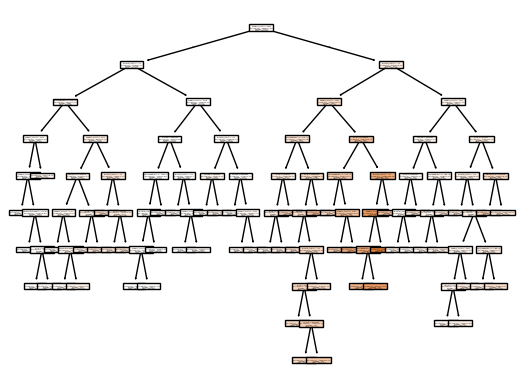

In [197]:
plot_tree(decision_tree=modelo_final_arbol_4,
            feature_names=x.columns,
            filled=True
                        )

In [198]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_4.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
245,1.029295,0.031983,0.022054,0.002198,10,55,100,12,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
244,1.031920,0.021364,0.022485,0.002863,10,55,100,9,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
247,1.021596,0.048097,0.021136,0.003908,10,55,100,15,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
246,1.071681,0.035120,0.021211,0.003859,10,55,100,14,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700319e+07,-2.547425e+07,-2.105404e+07,-2.417513e+07,-2.468712e+07,-2.447875e+07,1.961024e+06,1
240,1.103725,0.089737,0.020602,0.003245,10,55,70,9,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
241,1.106703,0.105104,0.021127,0.002607,10,55,70,12,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
242,1.021674,0.036898,0.018957,0.001221,10,55,70,14,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
243,1.022860,0.019458,0.020691,0.001836,10,55,70,15,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.700936e+07,-2.560544e+07,-2.110786e+07,-2.430266e+07,-2.473121e+07,-2.455131e+07,1.954724e+06,5
182,1.021550,0.043042,0.019892,0.002851,7,55,100,14,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.701095e+07,-2.568121e+07,-2.108293e+07,-2.423431e+07,-2.485062e+07,-2.457200e+07,1.977072e+06,9
183,1.036055,0.041838,0.019240,0.000871,7,55,100,15,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.701095e+07,-2.568121e+07,-2.108293e+07,-2.423431e+07,-2.485062e+07,-2.457200e+07,1.977072e+06,9


In [199]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
245,10,55,100,12,-2.447875e+07
244,10,55,100,9,-2.447875e+07
247,10,55,100,15,-2.447875e+07
246,10,55,100,14,-2.447875e+07
240,10,55,70,9,-2.455131e+07
...,...,...,...,...,...
36,3,50,100,9,-3.595721e+07
35,3,50,70,15,-3.595721e+07
34,3,50,70,14,-3.595721e+07
32,3,50,70,9,-3.595721e+07


In [200]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [201]:
df_rmse_prof

,param_max_depth,MSE
0,3,5996.433213
1,5,5217.152837
2,7,5035.107648
3,10,5031.716994


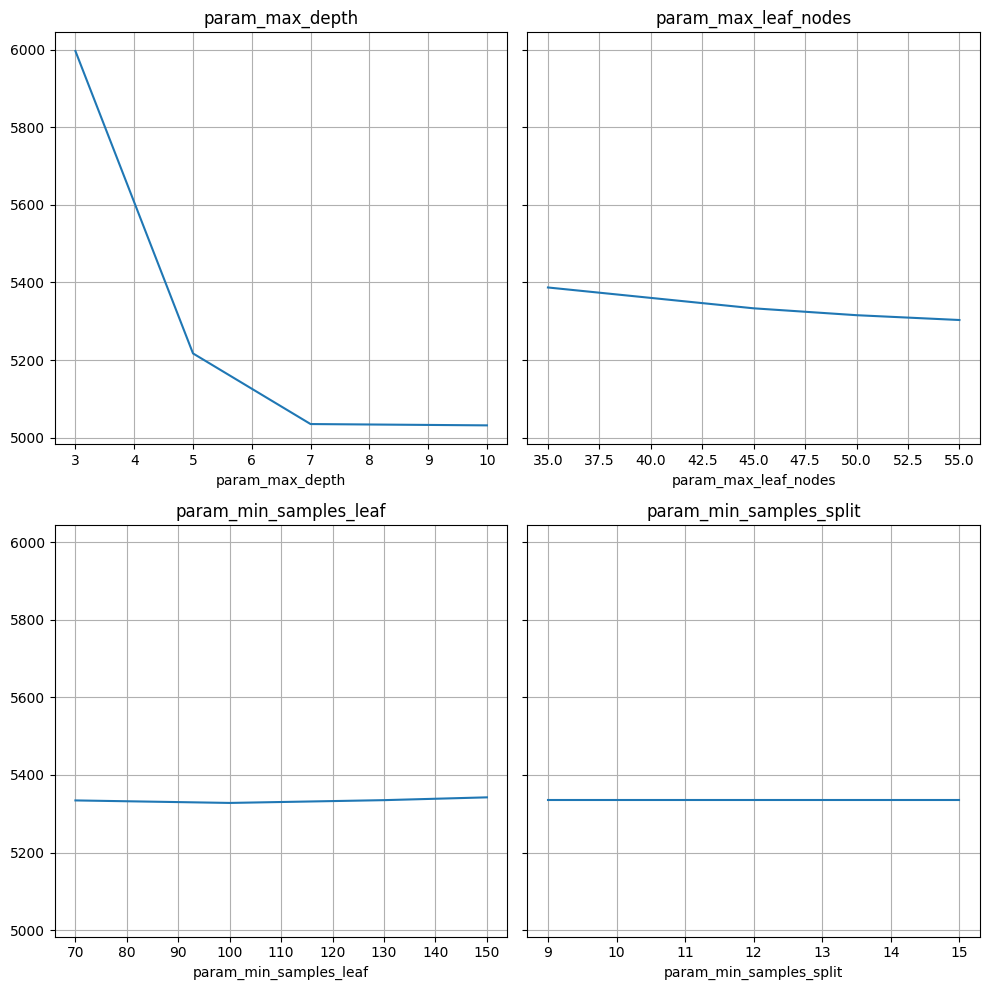

In [202]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 



In [203]:
pd.DataFrame(modelo_final_arbol_4.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

,Importancia
powerCV_robust,0.493441
kilometer_robust,0.296187
yearOfRegistration,0.095774
brand,0.057961
fuelType,0.031285
vehicleType,0.015797
notRepairedDamage,0.005075
gearbox,0.004480


In [204]:
# modelo_final_arbol = DecisionTreeRegressor(
#                     # max_depth=3,
#                     # max_leaf_nodes=15,
#                     # min_samples_split=150,
#                     # min_samples_leaf=25,
#                     # random_state=42
# )

# modelo_arbol.fit(x_train, y_train)

# y_pred_test = modelo_arbol.predict(x_test)
# y_pred_train = modelo_arbol.predict(x_train)
# df_metricas_arbol = metricas(y_train, y_pred_train, y_test, y_pred_test)